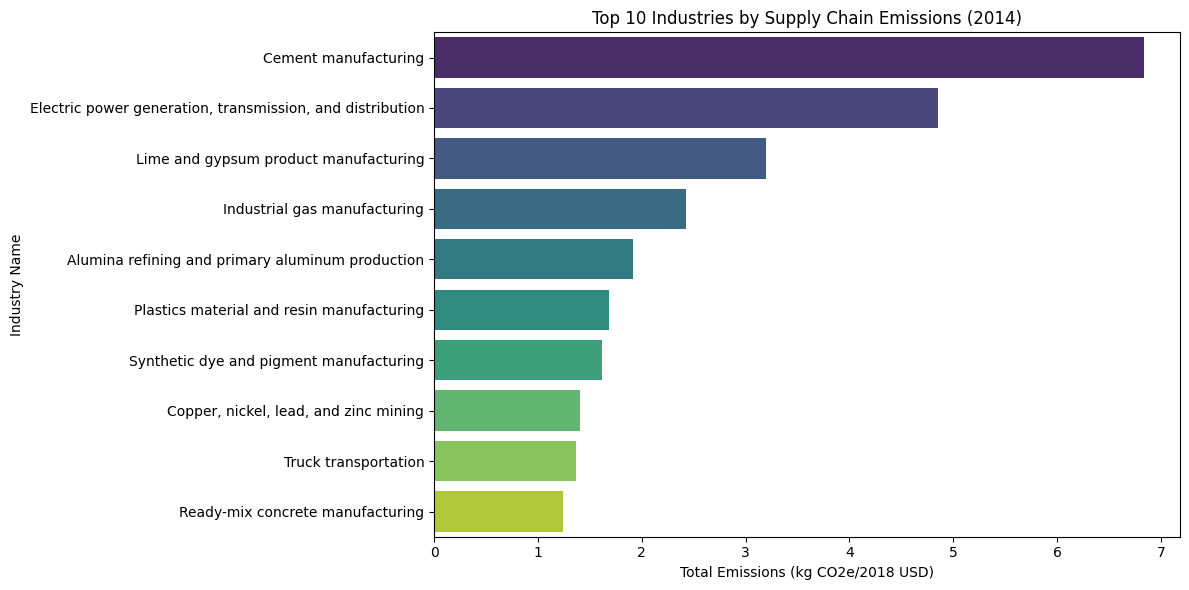

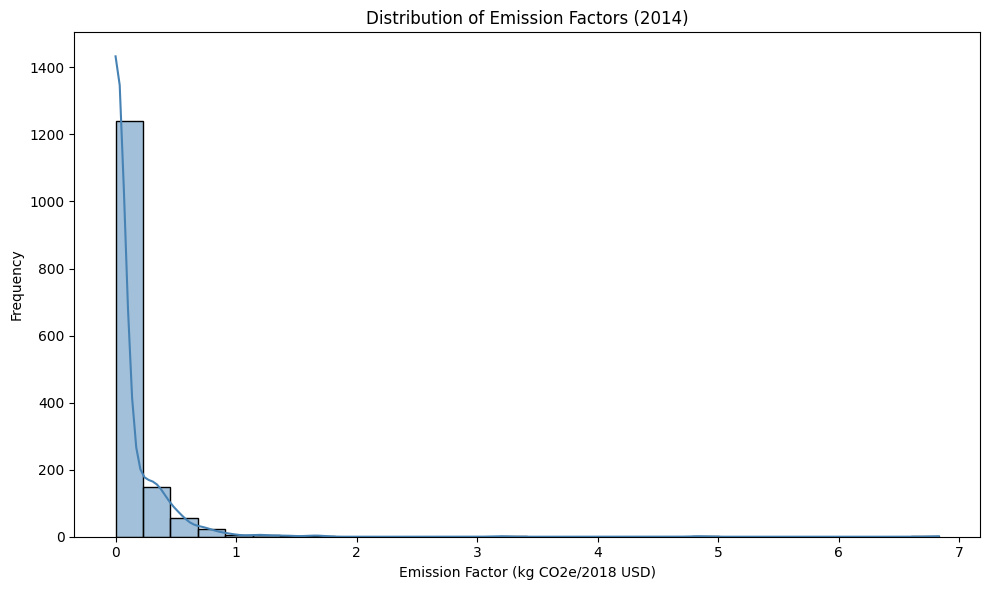

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Load Excel file and specific sheet
excel_path = '/content/SupplyChainEmission.xlsx'
sheet_name = '2014_Detail_Industry'

df = pd.read_excel(excel_path, sheet_name=sheet_name)

# STEP 2: Clean the data
df = df[['Industry Name', 'Supply Chain Emission Factors with Margins']]  # keep relevant columns
df = df.dropna()                     # remove rows with nulls
df = df.drop_duplicates()           # remove duplicate rows

# STEP 3: Save cleaned data as CSV
csv_path = '/content/cleaned_emissions_2014.csv'
df.to_csv(csv_path, index=False)

# STEP 4: Group and sort by total emissions
industry_emissions = df.groupby('Industry Name').sum(numeric_only=True)
top10 = industry_emissions.sort_values(by='Supply Chain Emission Factors with Margins', ascending=False).head(10)

# STEP 5: Bar chart of top 10 industries (warning-free)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Industry Name',
    data=top10.reset_index(),
    hue='Industry Name',
    palette='viridis',
    legend=False  # disables legend since labels are already shown on Y-axis
)
plt.title('Top 10 Industries by Supply Chain Emissions (2014)')
plt.xlabel('Total Emissions (kg CO2e/2018 USD)')
plt.ylabel('Industry Name')
plt.tight_layout()
plt.show()


# STEP 6: Histogram of emission distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Supply Chain Emission Factors with Margins'],
    bins=30,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Emission Factors (2014)')
plt.xlabel('Emission Factor (kg CO2e/2018 USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
